In [41]:
import pandas as pd
import chardet

import pandas as pd
df = pd.read_csv('C:/Users/Admin/TNTT/spam-5 (1).csv')
df.sample(5) 


,v1,v2
784,ham,"""Xin cảm ơn bạn đã đặt hàng! Đơn hàng của bạn ..."
643,ham,"""Bạn muốn quản lý chi tiêu hiệu quả hơn? Tải ứ..."
348,spam,Chúc mừng bạn đã thắng giải thưởng trị giá 5 t...
65,spam,Tham gia cuộc thi may mắn và nhận phần quà trị...
538,spam,"Chào bạn, chúng tôi đang có chương trình khuyế..."


In [42]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham    639    638  Lên kế hoạch cho cuộc họp tiếp theo. Đừng quên...    2
spam   742    741  Chúng tôi gửi đến bạn món quà trị giá 100 triệ...    2

In [43]:
df_spam = df[df['v1'] == 'spam']
df_spam.shape

(742, 2)

In [44]:
df_ham = df[df['v1'] == 'ham']
df_ham.shape

(640, 2)

In [45]:
df_spam_downsampled = df_spam.sample(df_ham.shape[0])
df_spam_downsampled.shape

(640, 2)

In [46]:
import pandas as pd
df_balanced = pd.concat([df_ham, df_spam_downsampled])
df_balanced.shape

(1280, 2)

In [47]:
df_balanced.sample(5)

,v1,v2
7,ham,Bạn có muốn ăn trưa cùng nhóm vào thứ sáu này ...
1328,spam,"**""Cơ hội vàng để sở hữu căn hộ cao cấp tại tr..."
388,spam,Nhanh tay đăng ký để nhận ngay voucher trị giá...
1345,spam,"**""Đầu tư bất động sản chưa bao giờ dễ dàng đế..."
913,ham,"""Bạn được mời tham dự lễ trao giải thể thao cu..."


In [48]:
if 'v1' in df_balanced.columns:
    df_balanced['label_num'] = df_balanced['v1'].map({'ham':0, 'spam':1})
    print(df_balanced.sample(10))
else:
    print("khum cóa")

        v1                                                 v2  label_num
848   spam  "Sở hữu ngay gói học tiếng Anh cấp tốc chỉ 99....          1
779   spam  "Khóa học lập trình miễn phí dành cho người mớ...          1
704   spam  "Bạn vừa đăng ký dịch vụ bảo hiểm thành công. ...          1
1325   ham  **"Chào anh Nam, Tài liệu thuyết trình cho cuộ...          0
560    ham  Cảm ơn bạn đã là khách hàng thân thiết của chú...          0
416   spam  Đừng bỏ lỡ! Bạn có thể nhận được một chiếc điệ...          1
372    ham  Cảm ơn bạn đã gửi bản cập nhật. Chúng ta sẽ th...          0
281    ham  Cảm ơn bạn đã gửi tài liệu kịp thời. Mọi thứ đ...          0
443    ham  Cảm ơn bạn đã hoàn thành báo cáo. Chúng ta sẽ ...          0
532    ham  Cảm ơn bạn đã gửi tài liệu về dự án. Chúng ta ...          0


In [49]:
import pandas as pd
import numpy as np
import re
from pyvi import ViTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
with open('vietnamesestopwords.txt','r',encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

In [51]:
tudonspam = Counter()
tudonham = Counter()
tughepspam = Counter()
tughepham = Counter()

def preprocess_and_tokenize(text, update_vocab=False, label=None):
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    text = text.strip()
    tokens = ViTokenizer.tokenize(text).split()
    tokens = [word for word in tokens if word not in stopwords]

    if update_vocab and label is not None:
        for token in tokens:
            if '_' in token:  # Từ ghép
                if label == 1:
                    tughepspam[token] += 1
                    print('đã thêm từ ghép spam vào từ điển')
                else:
                    if token not in tughepspam:
                        tughepham[token] += 1
                        print('đã thêm từ ghép ham vào từ điển')
            else:  # Từ đơn
                if label == 1:
                    tudonspam[token] += 1
                    print('đã thêm từ đơn spam vào từ điển')
                else:
                    if token not in tudonspam:
                        tudonham[token] += 1
                        print('đã thêm từ đơn ham vào từ điển')
                
    return ' '.join(tokens)

df_balanced['tokens'] = df_balanced.apply(lambda row: preprocess_and_tokenize(row['v2'], update_vocab=True, label=row['label_num']), axis=1)
print("Từ đơn Spam:", tudonspam)
print("Từ đơn Ham:", tudonham)
print("Từ ghép Spam:", tughepspam)
print("Từ ghép Ham:", tughepham)

đã thêm từ đơn ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào 

In [52]:
df_balanced.shape

(1280, 4)

In [53]:
import json 
import json

# Lưu từ điển
with open("tudonspam.json", "w", encoding="utf-8") as f:
    json.dump(dict(tudonspam), f, ensure_ascii=False, indent=4)

with open("tudonham.json", "w", encoding="utf-8") as f:
    json.dump(dict(tudonham), f, ensure_ascii=False, indent=4)

with open("tughepspam.json", "w", encoding="utf-8") as f:
    json.dump(dict(tughepspam), f, ensure_ascii=False, indent=4)

with open("tughepham.json", "w", encoding="utf-8") as f:
    json.dump(dict(tughepham), f, ensure_ascii=False, indent=4)


In [54]:
df_balanced['text_clean'] = df_balanced['v2'].apply(preprocess_and_tokenize)
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
phobert_model = TFAutoModel.from_pretrained("vinai/phobert-base")

inputs = tokenizer(list(df_balanced['text_clean']), padding=True, truncation=True, max_length=128, return_tensors="tf")

outputs = phobert_model(**inputs)
features = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy()
df_balanced['label_num'] = df['v1'].map({'ham': 0, 'spam': 1})
df_balanced['features'] = list(features)
print('dactrung:',features)
print('dataframe:\n',df_balanced.sample(5))

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


dactrung: [[-0.56227636  0.2551231   0.05991545 ...  0.53353024  0.16872005
   0.37183025]
 [-0.47231397  0.1500506  -0.42298657 ... -0.22974086  0.16820945
   0.68358314]
 [-0.01416286  0.26579255  0.1579203  ... -0.37527832 -0.4212764
  -0.57842624]
 ...
 [-0.02258798  0.3569401  -0.4004565  ... -0.16398406 -0.16002521
   0.2668854 ]
 [-0.46976408 -0.00780394 -0.0864633  ... -0.01694418 -0.17691845
   0.12362576]
 [-0.24203753  0.6807479  -0.24504529 ...  0.04152008 -0.28365734
   0.23016846]]
dataframe:
         v1                                                 v2  label_num  \
1067   ham  Hệ thống vừa cập nhật lịch thi học kỳ. Vui lòn...          0   
88    spam  Mua 1 tặng 2, thẻ quà tặng trị giá 100.000 VNĐ...          1   
1321  spam  **"Giảm giá sốc đến 50% cho các sản phẩm điện ...          1   
1119   ham  Nhắc nhở: Hồ sơ bảo hiểm của bạn cần được cập ...          0   
1040  spam  Bạn có biết? Chỉ với 299.000 VNĐ, bạn đã sở hữ...          1   

                              

In [55]:

def tinh(text, tudonspam, tudonham, tughepspam, tughepham):
    from collections import Counter
    tokens = text.split() 
    freq_vector = []
    spam_count = sum(tudonspam.get(token, 0) for token in tokens)  
    ham_count = sum(tudonham.get(token, 0) for token in tokens)    
    spam_phrases_count = sum(tughepspam.get(token, 0) for token in tokens) 
    ham_phrases_count = sum(tughepham.get(token, 0) for token in tokens)  

    freq_vector.extend([spam_count, ham_count, spam_phrases_count, ham_phrases_count])
    return freq_vector

# Áp dụng tính tần suất cho từng email
df_balanced['frequency_features'] = df_balanced['text_clean'].apply(
    lambda x: tinh(x, tudonspam, tudonham, tughepspam, tughepham)
)


In [56]:
import numpy as np

features_frequencies = np.array(df_balanced['frequency_features'].tolist())
features_combined = np.hstack((features, features_frequencies))

y = df_balanced['label_num'].values

In [57]:
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_combined, y, test_size=0.2, random_state=101)


In [58]:
#RandomSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['log2', 'sqrt',None]
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
param_grid = {
"n_estimators": n_estimators,
"max_features" : max_features,
"max_depth" : max_depth,
"min_samples_split" : min_samples_split,
"min_samples_leaf" : min_samples_leaf,
"bootstrap" : bootstrap,
}
print(param_grid)


{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['log2', 'sqrt', None], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [59]:
random_search = RandomizedSearchCV(
    estimator = RandomForestClassifier(),
    param_distributions = param_grid,
    n_iter = 50,
    cv = 5,
    verbose=2,
    random_state=42,
    n_jobs = -1,
    scoring = 'f1',
)
random_search.fit(X_train, y_train)
print("RandomizedSearchCV đã tối ưu thành công")
best_params = random_search.best_params_
print("best parameters: ", best_params)
best_model = random_search.best_estimator_



Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV đã tối ưu thành công
best parameters:  {'n_estimators': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 4, 'bootstrap': True}


In [60]:
X_test

array([[-2.23857358e-01,  3.13379556e-01, -1.90935656e-01, ...,
         1.01600000e+03,  5.10000000e+01,  3.59000000e+02],
       [-2.18432516e-01,  1.57336295e-01,  2.96804965e-01, ...,
         5.78000000e+02,  1.00000000e+00,  2.76000000e+02],
       [-7.52487257e-02,  5.00199199e-01, -1.25223324e-01, ...,
         0.00000000e+00,  5.21000000e+02,  2.09000000e+02],
       ...,
       [-1.84947122e-02,  5.48014104e-01, -2.16702417e-01, ...,
         6.00000000e+00,  4.80000000e+01,  0.00000000e+00],
       [ 1.22890212e-01,  3.02745581e-01,  1.27576336e-01, ...,
         1.70000000e+01,  1.22000000e+02,  4.30000000e+01],
       [-2.62916923e-01,  5.56041524e-02,  6.45139888e-02, ...,
         5.06000000e+02,  7.00000000e+00,  1.52000000e+02]])

In [61]:
X_train.data


Confusion Matrix:
 [[120  18]
 [  9 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       138
           1       0.86      0.92      0.89       118

    accuracy                           0.89       256
   macro avg       0.89      0.90      0.89       256
weighted avg       0.90      0.89      0.89       256



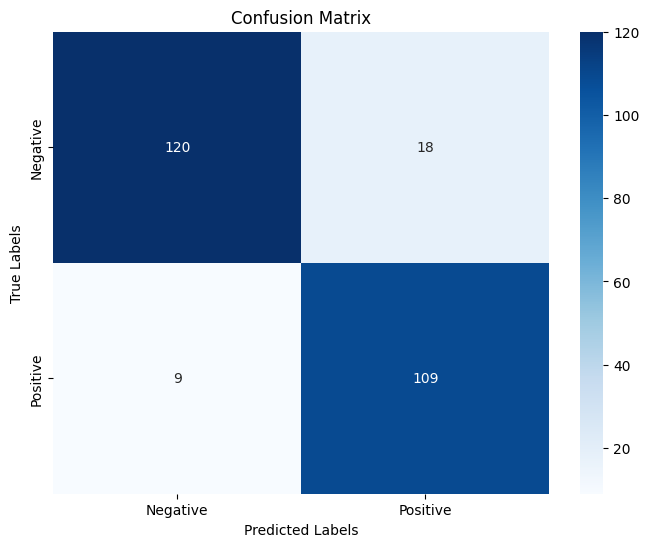

In [62]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [63]:
import pickle
pickle.dump(best_model, open("RF.pkl", "wb"))